In [1]:
from py_core import Board, Evidence, zigzag_iterator, iterator, reverse_iterator
from random import choice, sample
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fn = iterator
e = Evidence(counter_move=True, trace_back_fn=fn)

P-position


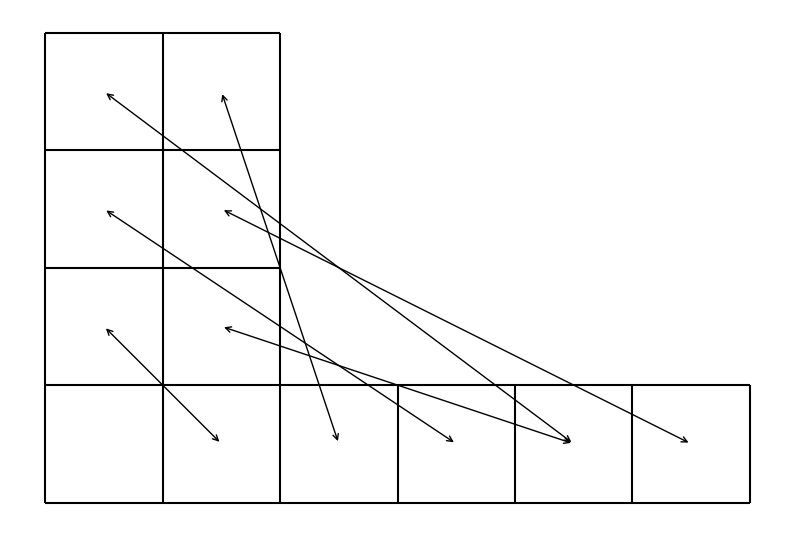

In [9]:
def draw_board(board):
    def draw(func, data):
        x = [i for i in range(len(data) + 1)]
        y = (data[0],) + data
        func(x, 0, y, colors='k')
    
    draw(plt.hlines, board.data)
    draw(plt.vlines, board.clone(False)._flip().data)

def draw_arrow(board):
    result = e.get(board)
    pairs = set()
    if not result:
        print("P-position")
        for move in fn(board):
            if move in pairs: continue
            new = board.chomp(*move, False)
            res = e.get(new)
            for option in res:
                pairs.add(tuple(sorted((move, option))))
        l = board.data[0] // 3
        for u, v in sorted(pairs):
            color = 'black'
            u = u[0] + 0.5, u[1] + 0.5
            v = v[0] + 0.5, v[1] + 0.5
            ax.annotate("", xy=u, xytext=v,arrowprops=dict(arrowstyle="<->", color=color))
    else:
        print("N-position")
        for move in fn(board):
            new = board.chomp(*move, False)
            res = e.get(new)
            if res is False: continue
            for option in res:
                pairs.add((move, option))
        for u, v in pairs:
            color = 'black'
            u = u[0] + 0.5, u[1] + 0.5
            v = v[0] + 0.5, v[1] + 0.5
            ax.annotate("", xy=u, xytext=v,arrowprops=dict(arrowstyle="<-", color=color))

fig, ax = plt.subplots(figsize=(10, 10))

def draw_proof(board):
    draw_board(board)
    draw_arrow(board)

# Edit here !!!!!!!!!
draw_proof(Board.from_ideal("<(6,0),(2,1),(0,4)>"))

plt.gca().set_aspect('equal', adjustable='box')
plt.axis('off')
plt.show()